#### sklearn.datasets: [Datasets](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)
The sklearn.datasets module includes utilities to load datasets, including methods to load and fetch popular reference datasets. It also features some artificial data generators.

### Polynomial Regression

Despite its name, linear regression can be used to fit non-linear functions. A linear regression model is linear in the model parameters, not necessarily in the predictors. If you add non-linear transformations of your predictors to the linear regression model, the model will be non-linear in the predictors.

A very popular non-linear regression technique is *Polynomial Regression*, a technique which models the relationship between the response and the predictors as an n-th order polynomial. 

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

The higher the order of the polynomial the more "wigglier" functions you can fit. 

Using higher order polynomial comes at a price: **computational complexity** and **overfitting**. Overfitting refers to a situation in which the model fits the idiosyncrasies of the training data and loses the ability to generalize from the seen to predict the unseen.

#### Housing Data

The Boston housing data set provides records measurements of 13 attributes of housing markets around Boston, as well as the median price. We want to predict the price of a market given a set of attributes.



In [1]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2,'font.family': [u'times']})

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline 

import pandas as pd

from sklearn import datasets

boston = datasets.load_boston()

print('Keys:', boston.keys())
print('Feature names:',boston.feature_names)
print(boston.DESCR)

X_boston,y_boston = boston.data, boston.target
print('Shape of data:', X_boston.shape, y_boston.shape)

Keys: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
Feature names: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances 

Text(0, 0.5, 'count')

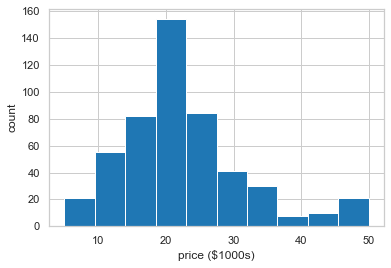

In [2]:
# Histogram of prices:
plt.hist(y_boston) 
plt.xlabel('price ($1000s)')
plt.ylabel('count')

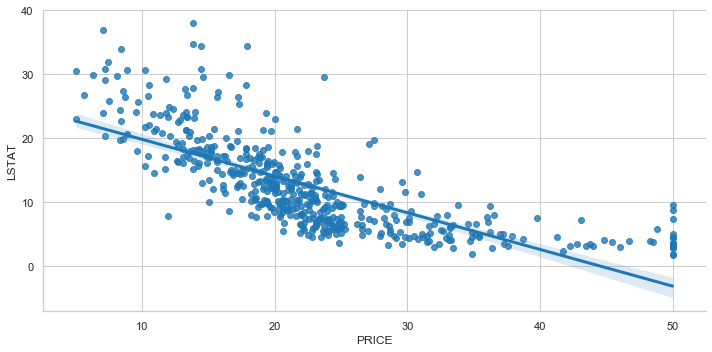

In [3]:
# Visualization of the relations between price and LSTAT
df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
df_boston['PRICE'] = boston.target
sns.lmplot("PRICE", "LSTAT", df_boston, height=5, aspect = 2);
#plt.savefig("files/ch06/lmplotBostonLSTAT.png", dpi = 300, bbox_inches = 'tight')

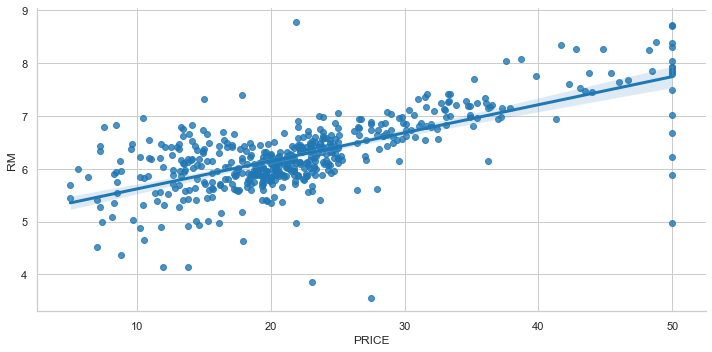

In [4]:
# Visualization of the relations between price and RM
sns.lmplot("PRICE","RM", df_boston, height=5, aspect = 2);

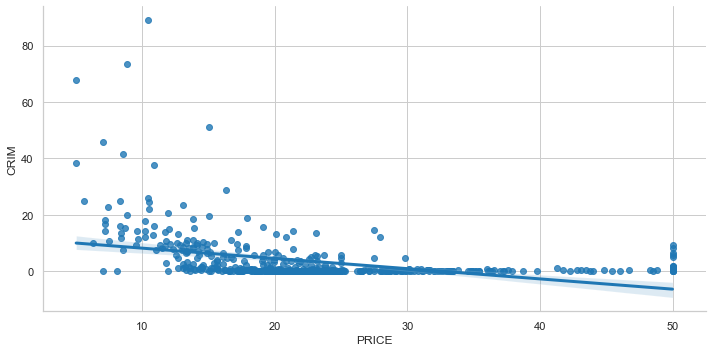

In [5]:
# Visualization of the relations between price and CRIM
sns.lmplot("PRICE", "CRIM", df_boston, height=5, aspect = 2);

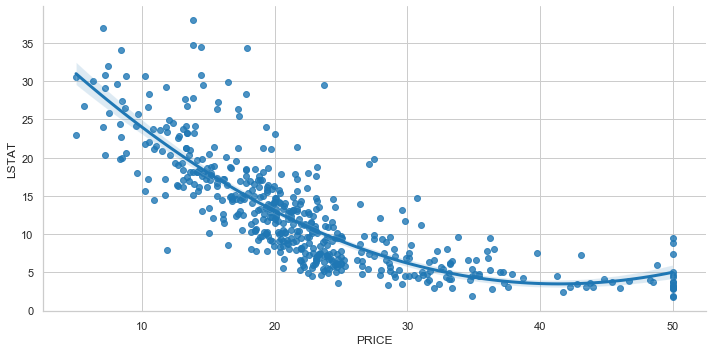

In [6]:
# Visualization of the relations between price and LSTAT with a polynomial of degree 2 
sns.lmplot("PRICE", "LSTAT", df_boston, order = 2, height=5, aspect = 2);

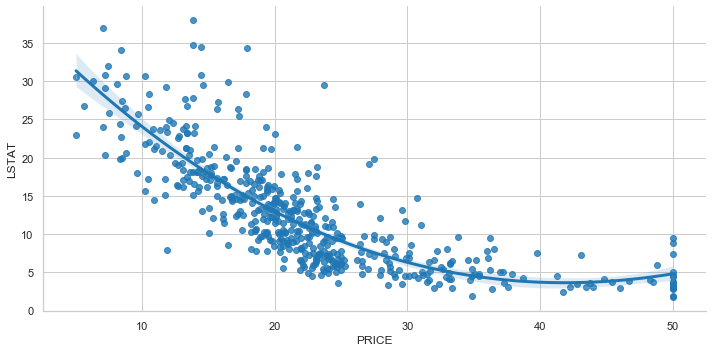

In [7]:
# Visualization of the relations between price and LSTAT with a polynomial of degree 3
sns.lmplot("PRICE", "LSTAT", df_boston, order = 3, height=5, aspect = 2);

#### Heatmap

We can also use corrplot function for plotting a diagonal correlation matrix.

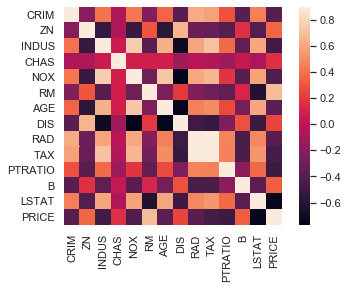

In [8]:
# Draw a heatmap 
#indexes = [0, 2, 4, 5, 6, 12] #To plot just some of the variables
#df2 = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
#df2['price'] = boston.target
df2 = df_boston
corrmat = df2.corr()
# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax = .9, square = True)
#plt.savefig("files/ch06/corrplot.png", dpi = 300, bbox_inches = 'tight')

Using correlaton matrix heatmap we can observe that "RM" and "LSTAT" are the variables more correlated with "Price".

#### Scatter plot

Let's explore multiple variables with scatter plot
The scatter plot of Pandas is a grid of plots of multiple varaibles one against the other, showing the relationship of each variable to the others.

For the sake of visualization, we choose 3 from the set of 13 variables (LSTAT, AGE, RM):

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
['RM' 'AGE' 'LSTAT']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C038BF2EC8>,
      dtype=object)

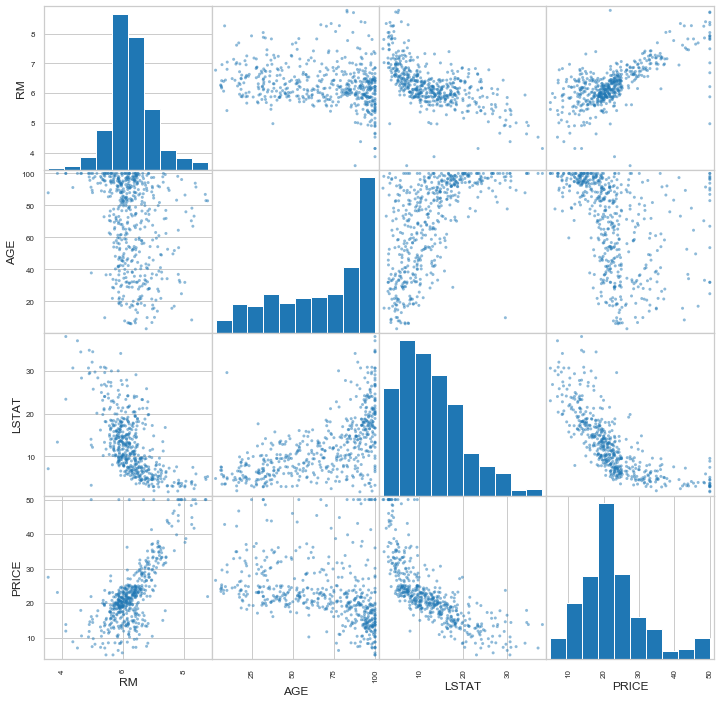

In [9]:
print (boston.feature_names)
indexes = [5, 6, 12] # 3 of the 13 variables: LSTAT, AGE, RM.
print(boston.feature_names[indexes])

indexes = [5, 6, 12]
df_scatter = pd.DataFrame(boston.data[:,indexes], columns = boston.feature_names[indexes])
df_scatter['PRICE'] = boston.target
pd.plotting.scatter_matrix(df_scatter, figsize = (12.0, 12.0))  

#### Predictions

Let's make predictions. Evaluation on new samples using Scikit-learn.
We will split the data into training set and test set:

In [10]:
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model

train_size = int(X_boston.shape[0]/2)
X_train = X_boston[:train_size]
X_test = X_boston[train_size:]
y_train = y_boston[:train_size]
y_test = y_boston[train_size:]
print('Training and testing set sizes', X_train.shape, X_test.shape)
regr_boston = linear_model.LinearRegression()
regr_boston.fit(X_train, y_train) 
print('Coeff and intercept:', regr_boston.coef_, regr_boston.intercept_)
# Best possible score is 1.0, lower values are worse.
print('Training Score:', regr_boston.score(X_train, y_train)) 
print('Testing Score:', regr_boston.score(X_test, y_test)) 
print('Training MSE: ', np.mean((regr_boston.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_boston.predict(X_test) - y_test)**2))

Training and testing set sizes (253, 13) (253, 13)
Coeff and intercept: [ 1.20133313  0.02449686  0.00999508  0.42548672 -8.44272332  8.87767164
 -0.04850422 -1.11980855  0.20377571 -0.01597724 -0.65974775  0.01777057
 -0.11480104] -10.017430582945078
Training Score: 0.8557827200735684
Testing Score: -2.252734342392449
Training MSE:  9.987517325463742
Testing MSE:  303.4368629265822


We can see that all the coefficients obtained are different from zero, meaning that no variable is discarded.
Next, we try to build a sparse model to predict the price using the most important factors and discarding the non-informative ones. To do this, we can create a LASSO regressor, forcing zero coefficients.

### Sparse models

Often, in real problems, there are uninformative variables in the data which prevent proper modeling of the problem and thus, the building of a correct regression model. In such cases, a feature selection process is crucial to select only the informative features and discard non-informative ones. This can be achieved by sparse methods which use a penalization approach, such as *LASSO* (least absolute shrinkage and selection operator) to set some model coefficients to zero (thereby discarding those variables). Sparsity can be seen as an application of Occam’s razor: prefer simpler models to complex ones.


In [11]:
# Create a Lasso regressor
regr_lasso = linear_model.Lasso(alpha=.3)
regr_lasso.fit(X_train, y_train) 
print('Coeff and intercept:', regr_lasso.coef_,  regr_lasso.intercept_)
# Are the coeficients now sparse?
print('Training Score:', regr_lasso.score(X_train, y_train))
print( 'Testing Score:', regr_lasso.score(X_test, y_test) )
# Is the score almost the same?
print('Training MSE: ', np.mean((regr_lasso.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((regr_lasso.predict(X_test) - y_test)**2))

Coeff and intercept: [ 0.          0.01996512 -0.          0.         -0.          7.69894744
 -0.03444803 -0.79380636  0.0735163  -0.0143421  -0.66768539  0.01547437
 -0.22181817] -6.1832418361484045
Training Score: 0.8449992039829642
Testing Score: 0.501127529021216
Training MSE:  10.734311009544221
Testing MSE:  46.538168094875665


It can now be seen that the result of the model fitting for a set of sparse coefficients is much better than before (using all the variables), with the testing score increasing from -2.24 to 0.5. This demonstrates that four of the initial variables are not important for the prediction and in fact they confuse the regressor.

In [12]:
print(boston.data.shape)
print(boston.target.shape)
print(boston.feature_names)
print("max, min and mean:", np.max(boston.target), np.min(boston.target), np.mean(boston.target))

(506, 13)
(506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
max, min and mean: 50.0 5.0 22.532806324110677


In [13]:
indexes_non_selected = [0, 2, 3, 4]
print('Non important variable:', boston.feature_names[indexes_non_selected])
most_important_index=[5]
print('Most important variable:', boston.feature_names[most_important_index])

Non important variable: ['CRIM' 'INDUS' 'CHAS' 'NOX']
Most important variable: ['RM']


In [14]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print('Order variable (from less to more important):', boston.feature_names[ind])

Order variable (from less to more important): ['CRIM' 'INDUS' 'CHAS' 'NOX' 'TAX' 'B' 'ZN' 'AGE' 'RAD' 'LSTAT' 'PTRATIO'
 'DIS' 'RM']


We can select the most important features with sklearn:

In [15]:
import sklearn.feature_selection as fs 
selector = fs.SelectKBest(score_func = fs.f_regression, k = 5)
selector.fit_transform(X_train, y_train)
print('Selected features:', set(zip(selector.get_support(), boston.feature_names))) # Show the selected features

Selected features: {(False, 'CRIM'), (False, 'NOX'), (False, 'CHAS'), (False, 'DIS'), (True, 'AGE'), (False, 'ZN'), (True, 'LSTAT'), (True, 'PTRATIO'), (False, 'B'), (True, 'INDUS'), (False, 'RAD'), (False, 'TAX'), (True, 'RM')}


The set of selected features is now different, since the criterion has changed. However, three of the most important features are among them: 'RM', 'PTRATIO' and 'LSTAT'.

Let's evaluate the predictions.

Text(0, 0.5, 'Predicted price ($1000s)')

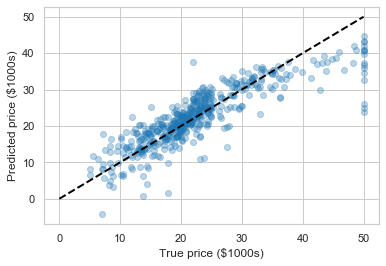

In [16]:
# Visualization of target and predicted responses
clf = linear_model.LinearRegression()
clf.fit(boston.data, boston.target)
predicted = clf.predict(boston.data)
plt.scatter(boston.target, predicted, alpha = 0.3)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')

The model seem to be a good fitting except for the more expensive houses.

Model evaluation:

In [17]:
clf.score(boston.data, boston.target)  # Best possible score is 1.0, lower values are worse.

0.7406426641094095

In [18]:
# Score using a single feature
regr_feat1 = linear_model.LinearRegression()
for i in np.arange(13):
    feat1 = X_train[:,i:i+1]
    regr_feat1.fit(feat1, y_train)    
    print('Feature:', boston.feature_names[i])
    print('Score:', regr_feat1.score(feat1, y_train)) 

Feature: CRIM
Score: 0.05024843836202264
Feature: ZN
Score: 0.10206594240694711
Feature: INDUS
Score: 0.13068434569181497
Feature: CHAS
Score: 0.00018610373661331892
Feature: NOX
Score: 0.11130139266941119
Feature: RM
Score: 0.7699004053318655
Feature: AGE
Score: 0.11300215206715913
Feature: DIS
Score: 0.018087821597697507
Feature: RAD
Score: 0.0015003535946076507
Feature: TAX
Score: 0.05512205417475469
Feature: PTRATIO
Score: 0.13721073435814335
Feature: B
Score: 0.0463878641534512
Feature: LSTAT
Score: 0.5035503901281464


In [19]:
from sklearn.preprocessing import StandardScaler
# Create the transformer StandardScaler for data and target
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train.reshape(-1, 1))

print("\nBefore transformation:")
print("max, min and mean:", np.max(y_train), np.min(y_train), np.mean(y_train) )

# Normalization of train and test data using mean and variance of the training
X_train = scalerX.transform(X_train)
y_train = scalery.transform(y_train.reshape(-1, 1))
X_test = scalerX.transform(X_test)
y_test = scalery.transform(y_test.reshape(-1, 1))

print("\nAfter transformation:")
print("max, min and mean:", np.max(y_train), np.min(y_train), np.mean(y_train))


Before transformation:
max, min and mean: 50.0 11.8 24.307509881422927

After transformation:
max, min and mean: 3.0873514853387736 -1.5029714532177498 -2.808469311304744e-16


#### Statistical evaluation

The ``statsmodels`` package provides several different classes that provide different options for linear regression. Getting started with linear regression is quite straightforward with the OLS module.

We can perform the regression of the predictor on the response, using the ``sm.OLS`` class and its initialization ``OLS(y, X)`` method. This method takes as an input two array-like objects: $X$ and $\textbf{y}$. In general, $X$ will either be a numpy array or a pandas data frame with shape ``(n, p)`` where $n$ is the number of data points and $p$ is the number of predictors. $\textbf{y}$ is either a one-dimensional numpy array or a pandas series of length $n$.

In [20]:
import statsmodels.api as sm
X2 = X_boston[:,12] # Let's use column 12 (LSTAT) to perform a regression:
X12 = sm.add_constant(X2)  # Adds a constant term to the predictor
est = sm.OLS(y_boston, X2) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.448
Method:                 Least Squares   F-statistic:                              410.9
Date:                Sat, 06 Jun 2020   Prob (F-statistic):                    2.71e-67
Time:                        21:37:14   Log-Likelihood:                         -2182.4
No. Observations:                 506   AIC:                                      4367.
Df Residuals:                     505   BIC:                                      4371.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1221      0.055     20.271      0.000       1.013       1.231
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                1.051
Skew:                           0.112   Prob(JB):                        0.591
Kurtosis:                       3.009   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""